<a href="https://colab.research.google.com/github/willdphan/number-cnn/blob/main/Deep_Learning_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
%%capture
from keras.datasets import mnist

In [30]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [31]:
type(train_images)

numpy.ndarray

In [32]:
train_images.dtype

dtype('uint8')

In [33]:
train_images.ndim

3

In [34]:
train_images.shape

(60000, 28, 28)

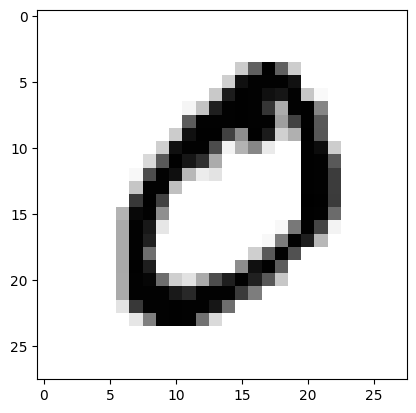

In [35]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1,:,:], cmap = plt.cm.binary)
plt.show()

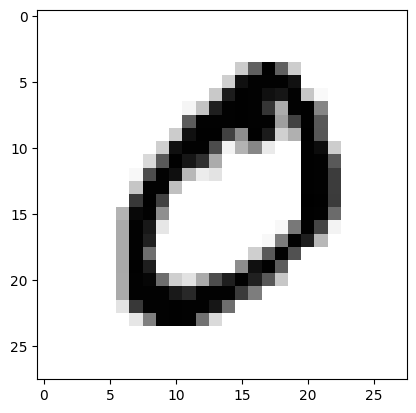

In [36]:
plt.imshow(train_images[1,:,:], cmap = plt.cm.binary)
plt.show()

In [37]:
type(train_labels)

numpy.ndarray

In [38]:
train_labels.shape

(60000,)

In [39]:
train_labels[1]

0

In [40]:
train_labels[2]

4

In [41]:
type(test_images)

numpy.ndarray

In [42]:
test_images.shape

(10000, 28, 28)

In [43]:
test_images.ndim

3

In [44]:
test_labels.shape

(10000,)

In [45]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255

In [46]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255

In [47]:
train_images.shape

(60000, 784)

In [48]:
test_images.shape

(10000, 784)

In [49]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [50]:
from keras import models
from keras import layers

In [51]:
model = models.Sequential()

In [52]:
model.add(layers.Dense(512, activation = "relu", input_shape = (28*28, )))
model.add(layers.Dense(10, activation = "softmax"))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer= "rmsprop",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [55]:
model.fit(train_images,
         train_labels,
         epochs = 5,
         batch_size = 128)

Epoch 1/5
469/469 [==============================] - 12s 23ms/step - loss: 0.2690 - accuracy: 0.9224
Epoch 2/5
469/469 [==============================] - 11s 23ms/step - loss: 0.1090 - accuracy: 0.9677
Epoch 3/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0714 - accuracy: 0.9784
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0522 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0382 - accuracy: 0.9887


In [56]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss : ", test_loss,"\ntest_acc : ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0644 - accuracy: 0.9798
test_loss :  0.06438378244638443 
test_acc :  0.9797999858856201
